In [ ]:
pip install yfinance

In [ ]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1676939580000,2023-02-21 00:33:00,BTC/USD,24859.34,24859.34,24859.34,24859.34,0.000000,0.000000
1,1676939520000,2023-02-21 00:32:00,BTC/USD,24821.96,24859.34,24821.96,24859.34,0.103099,2562.977818
2,1676939460000,2023-02-21 00:31:00,BTC/USD,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178
3,1676939400000,2023-02-21 00:30:00,BTC/USD,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450
4,1676939340000,2023-02-21 00:29:00,BTC/USD,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431
...,...,...,...,...,...,...,...,...,...
278679,1660023780000,2022-08-09 05:43:00,BTC/USD,23900.00,23900.00,23895.99,23895.99,0.439359,10498.907995
278680,1660023720000,2022-08-09 05:42:00,BTC/USD,23903.19,23903.19,23900.00,23900.00,0.001431,34.190145
278681,1660023660000,2022-08-09 05:41:00,BTC/USD,23890.16,23903.19,23890.16,23903.19,0.000712,17.030067
278682,1660023600000,2022-08-09 05:40:00,BTC/USD,23892.70,23892.70,23884.31,23890.16,0.004689,112.011404


In [ ]:
btc = yf.Ticker('BTC-USD')
# prices1 = btc.history(period='5y')
data.drop(columns=[ 'Volume BTC'], axis = 1, inplace = True)


In [ ]:
data.to_csv('crypto prices.csv')

In [ ]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [ ]:
data.shape

(278683, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278683 entries, 0 to 278682
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Timestamp   278683 non-null  int64  
 1   Date        278683 non-null  object 
 2   Symbol      278683 non-null  object 
 3   Open        278683 non-null  float64
 4   High        278683 non-null  float64
 5   Low         278683 non-null  float64
 6   Close       278683 non-null  float64
 7   Volume USD  278683 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 17.0+ MB


<Axes: ylabel='High'>

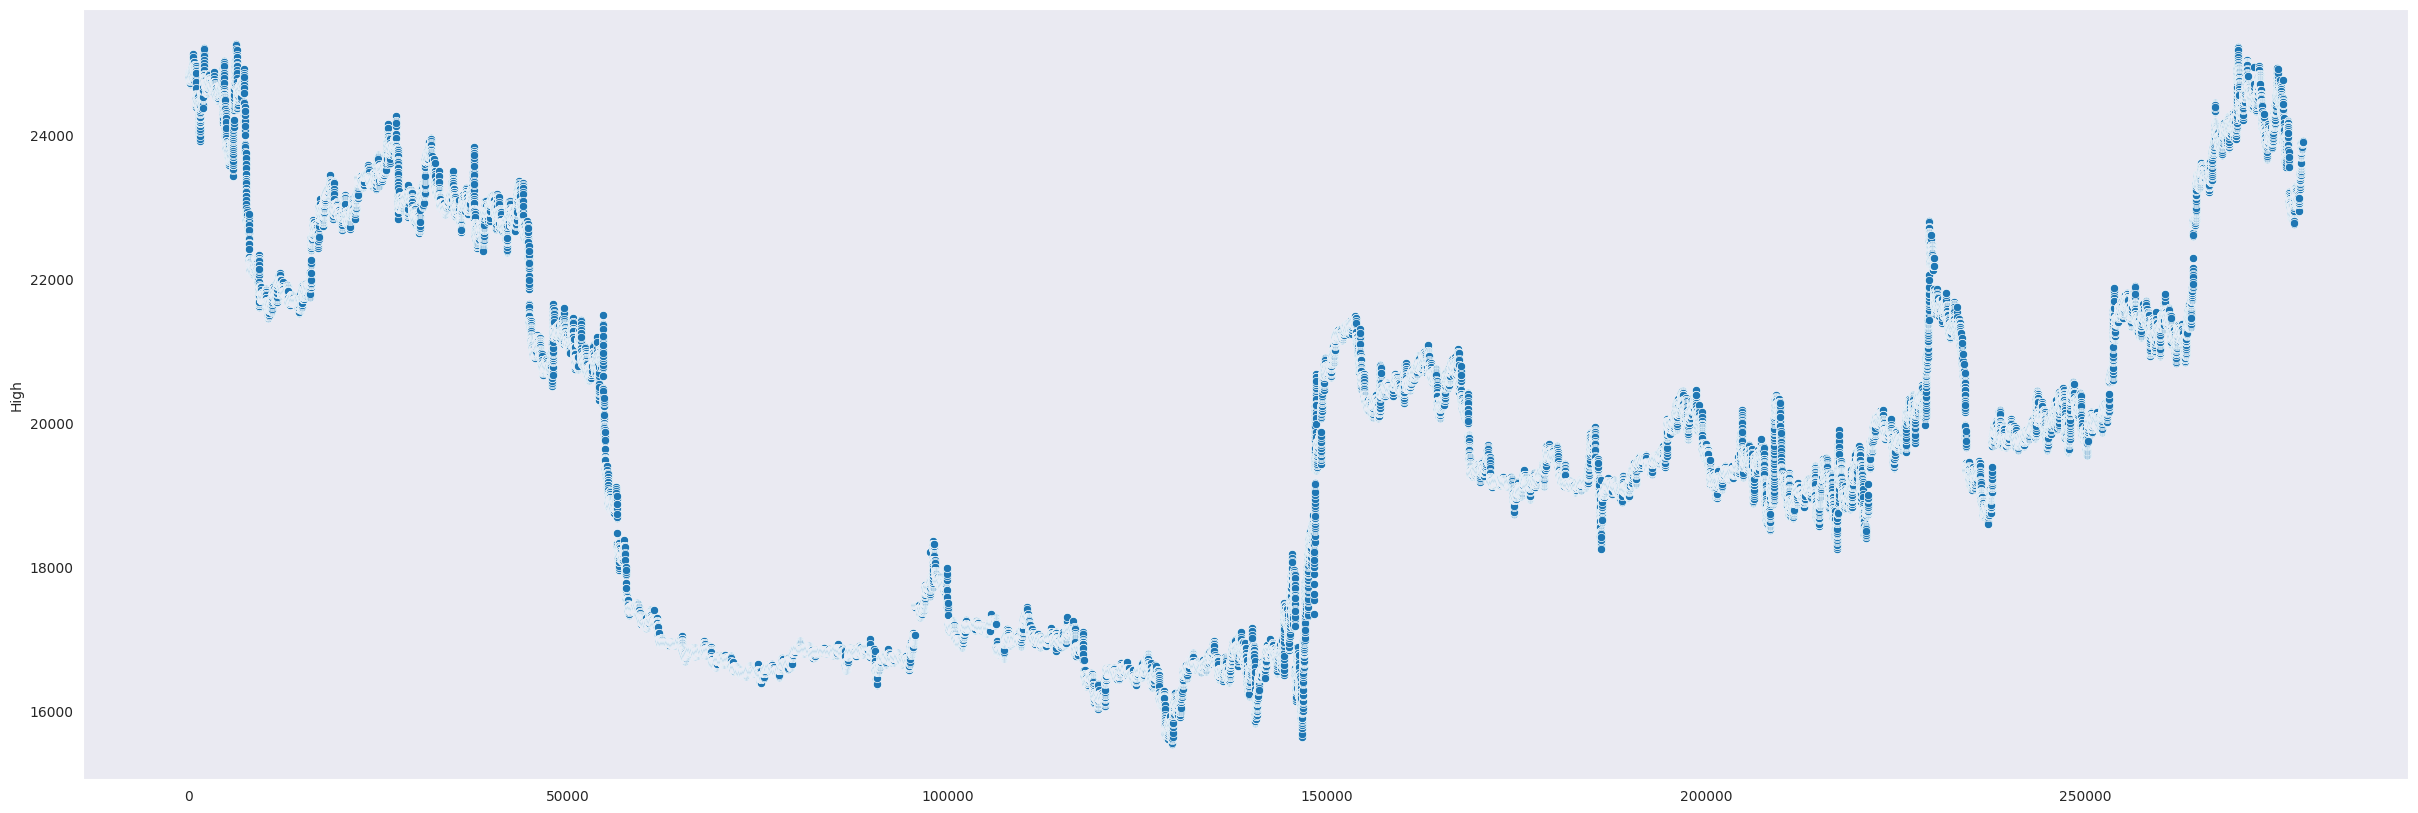

In [ ]:
plt.figure(figsize = (30, 10))
sns.set_style('dark')
sns.scatterplot(data=data.High)

Text(0.5, 1.0, 'Volume')

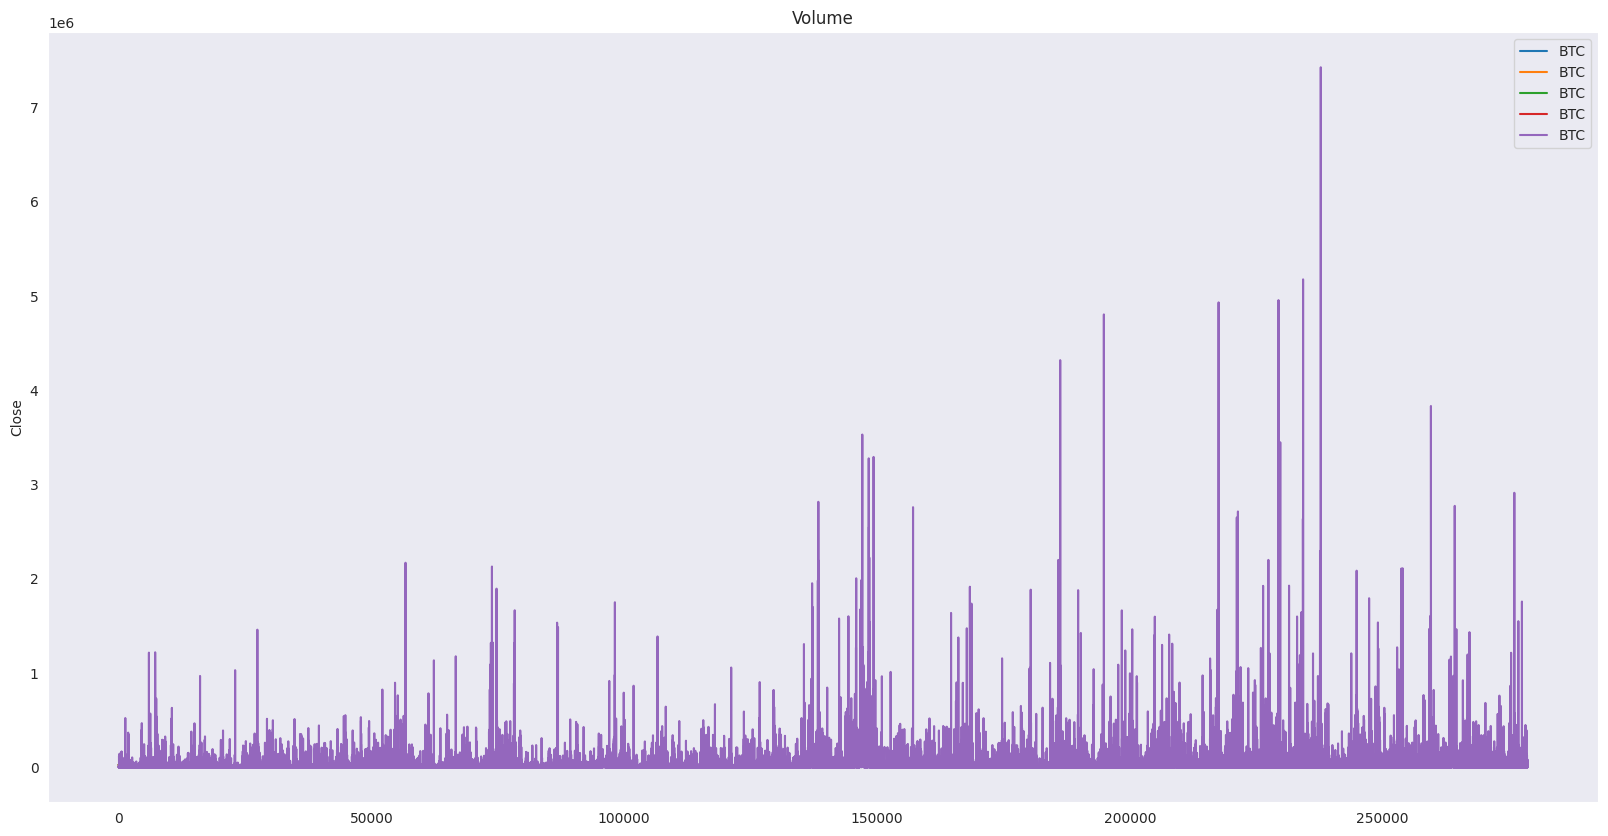

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close'], label = 'BTC')
sns.lineplot(data = data['High'], label = 'BTC')
sns.lineplot(data = data['Low'], label = 'BTC')
sns.lineplot(data = data['Open'], label = 'BTC')
sns.lineplot(data = data['Volume USD'], label = 'BTC')
plt.title('Volume')

In [ ]:
data_btc = data.loc[:,'Close'].values
data_btc

array([24859.34, 24859.34, 24821.96, ..., 23900.  , 23903.19, 23890.16])

array([[<Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume USD'}>, <Axes: >, <Axes: >]],
      dtype=object)

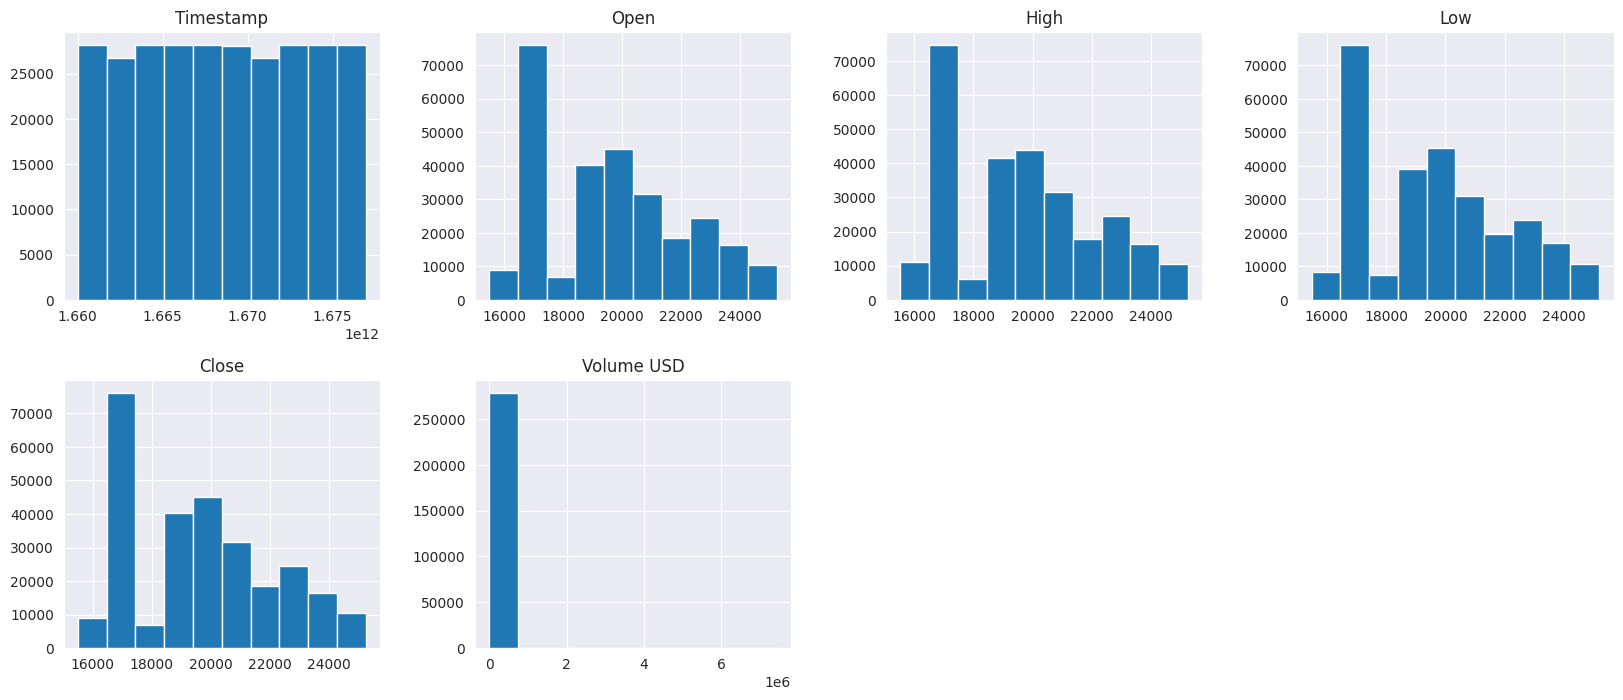

In [ ]:
data.hist(figsize=(20, 8), layout=(2, 4))

In [ ]:
data.corr()

<ipython-input-158-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Timestamp,Open,High,Low,Close,Volume USD
Timestamp,1.000000,-0.024230,-0.024612,-0.023828,-0.024206,-0.076827
Open,-0.024230,1.000000,0.999988,0.999987,0.999981,0.001901
High,-0.024612,0.999988,1.000000,0.999976,0.999988,0.003400
Low,-0.023828,0.999987,0.999976,1.000000,0.999989,-0.000058
Close,-0.024206,0.999981,0.999988,0.999989,1.000000,0.001520
Volume USD,-0.076827,0.001901,0.003400,-0.000058,0.001520,1.000000


In [ ]:
X = data.drop(columns = ['Close','Date','Symbol'], axis = 1)
Y = data.loc[:, 'Close']

In [ ]:
X.head(5)

,Timestamp,Open,High,Low,Volume USD
0,1676939580000,24859.34,24859.34,24859.34,0.000000
1,1676939520000,24821.96,24859.34,24821.96,2562.977818
2,1676939460000,24818.09,24821.96,24815.47,2249.866178
3,1676939400000,24812.25,24818.09,24812.25,54.681450
4,1676939340000,24809.27,24812.25,24809.27,2249.862431


In [ ]:
Y.head()

0    24859.34
1    24859.34
2    24821.96
3    24818.09
4    24812.25
Name: Close, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

In [ ]:
print("-"*30)
print("random forest: ", r2rf)
print("-"*30)

------------------------------
random forest:  0.9999920634408681
------------------------------


Text(0.5, 1.0, 'Actual vs Predicted values in training data')

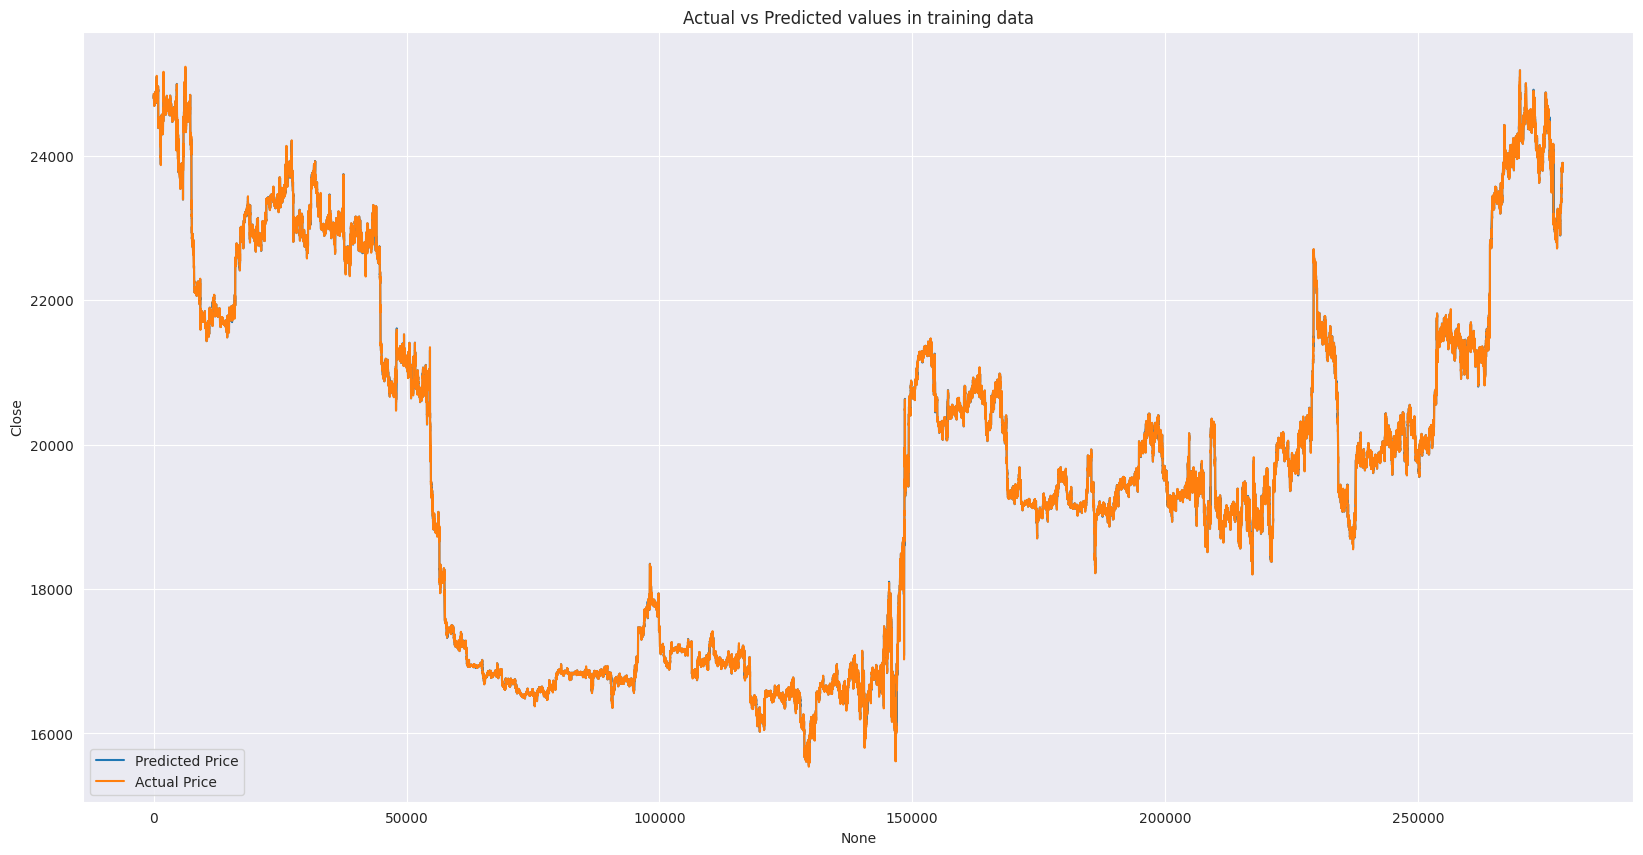

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
plt.title('Actual vs Predicted values in training data')

In [ ]:
rf.predict(X_train)

array([19192.8201, 19052.6607, 20505.4007, ..., 17470.    , 19295.6091,
       17103.7156])

In [ ]:
df = X.head(1)
df

,Timestamp,Open,High,Low,Volume USD
0,1676939580000,24859.34,24859.34,24859.34,0.0


In [ ]:
df = pd.DataFrame([[1676939580000,2500,2300,2450,0.27899]],columns=['Timestamp','Open','High','Low','Volume USD'])
rf.predict(df)

array([15565.901])

In [ ]:
import pickle


In [ ]:
pickle_out = open("CryptoPred1.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()